Mount the Drive

In [ ]:
# prompt: mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Read AG4 folder from the Drive

In [ ]:
# prompt: read AG4 dataset from drive

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4_data"



Display all the files in the folder AG4

In [ ]:
# prompt: display all files in the directory AG4

import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# List all files in the AG4 directory
files = os.listdir(data_path)

# Print the files
print(files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['diabetes.csv', 'heart.csv', 'thyroid_csv.xlsx', 'breast_cancer.csv', 'iris.csv']


Preprocessing

Read and Print breas_cancer.csv

In [ ]:
# prompt: read and print breast_cancer.csv

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Print the breast cancer data
print(breast_cancer_data)


     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


Read the null values in breast_cancer.csv

In [ ]:
# prompt: read the null values in breast_cancer.csv

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Count the number of null values in each column
null_values = breast_cancer_data.isnull().sum()

# Print the number of null values
print(null_values)


Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


Perform Statistical Analysis for breast_cancer.csv

In [ ]:
# prompt:  do statistical analysis for breast_cancer.csv

# Calculate descriptive statistics for the breast cancer data
descriptive_stats = breast_cancer_data.describe()

# Print the descriptive statistics
print(descriptive_stats)

# Calculate the correlation matrix for the breast cancer data
correlation_matrix = breast_cancer_data.corr()

# Print the correlation matrix
print(correlation_matrix)


              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

Check the Outliers for breast_cancer.csv

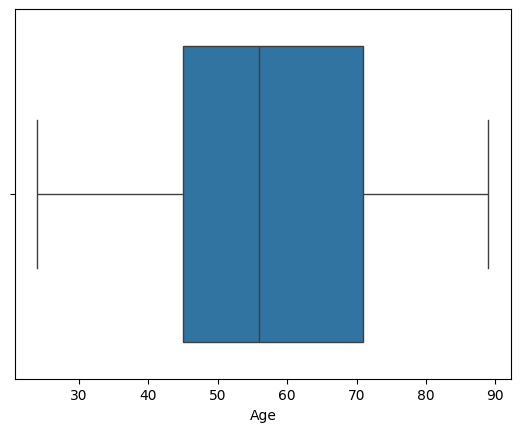

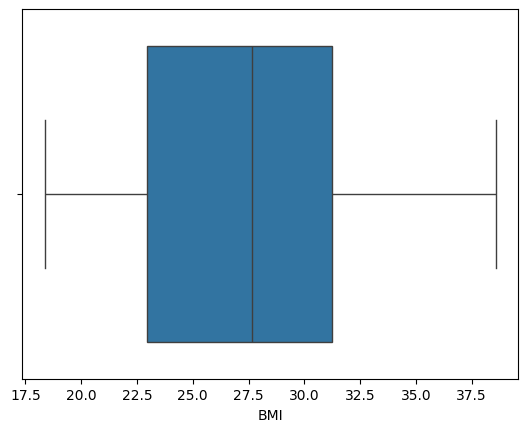

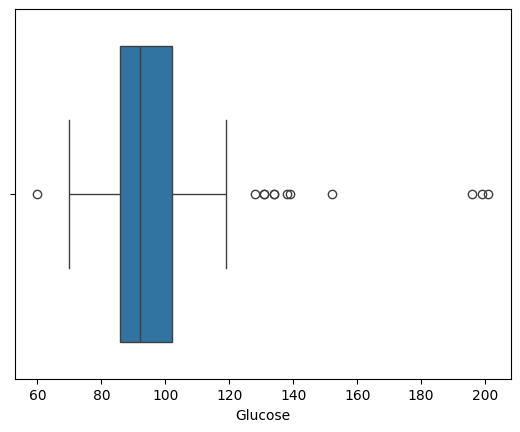

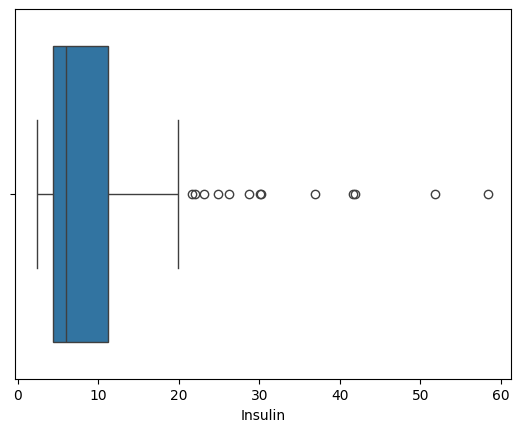

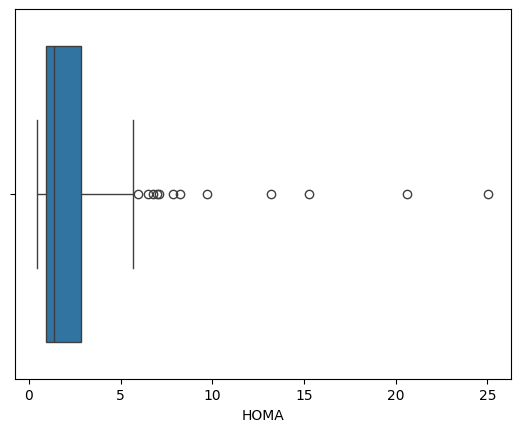

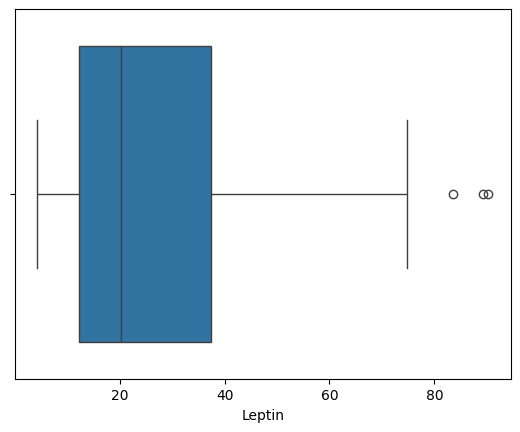

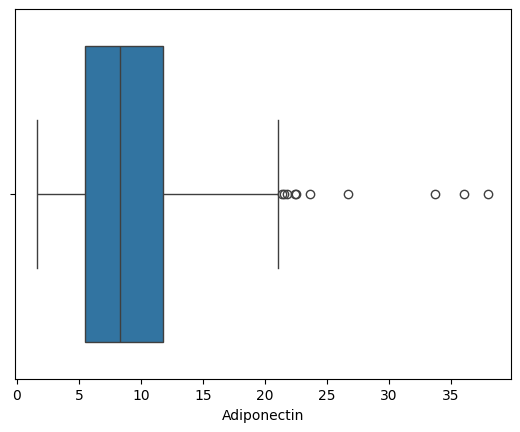

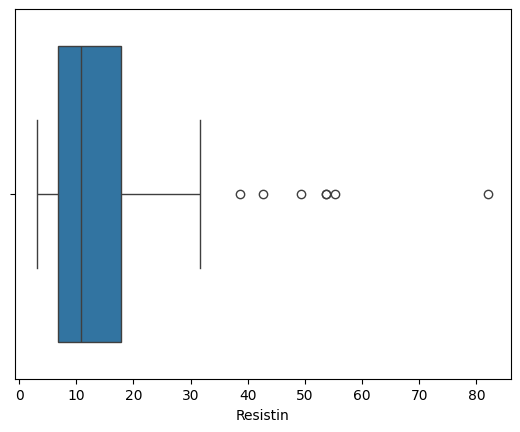

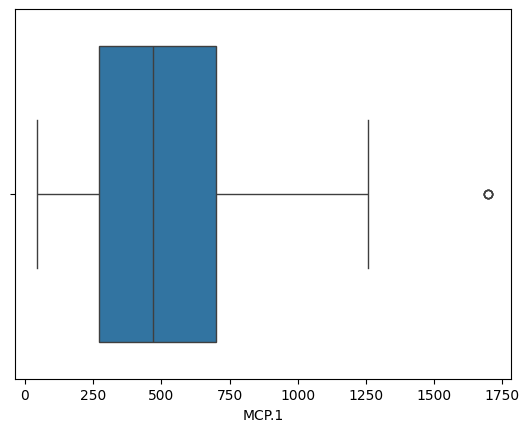

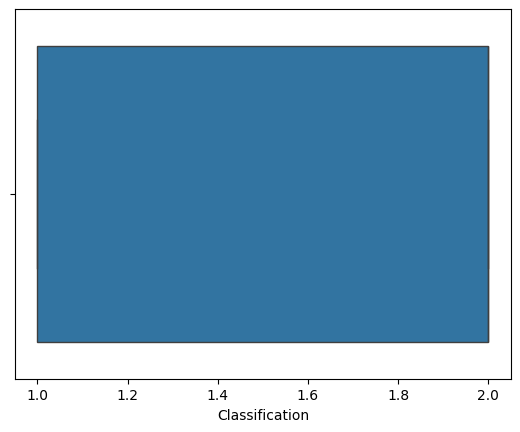

In [ ]:
# prompt: check the outliers for breast_cancer.csv

import seaborn as sns
import matplotlib.pyplot as plt
# Create a boxplot for each column in the breast cancer data
for column in breast_cancer_data.columns:
  sns.boxplot(x=breast_cancer_data[column])
  plt.show()


# Remove the Outliers from breast_cancer.csv

In [ ]:
# prompt: remove the  outliers for breast_cancer.csv

import pandas as pd
from scipy import stats

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Define a function to remove outliers using z-score
def remove_outliers(df, column, threshold=3):
  mean = df[column].mean()
  std = df[column].std()
  z_scores = (df[column] - mean) / std
  return df[(z_scores < threshold) & (z_scores > -threshold)]

# Remove outliers for each column in the breast cancer data
for column in breast_cancer_data.columns:
  breast_cancer_data = remove_outliers(breast_cancer_data, column)

# Print the breast cancer data after removing outliers
print(breast_cancer_data)


     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
108   68  35.560000      131    8.150  2.633537  17.8700    11.900000   
109   75  30.480000      152    7.010  2.628283  50.5300    10.060000   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


Print the Outliers after removing the outliers from breast_cancer.csv

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
108   68  35.560000      131    8.150  2.633537  17.8700    11.900000   
109   75  30.480000      152    7.010  2.628283  50.5300    10.060000   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.06405  468.786               1  


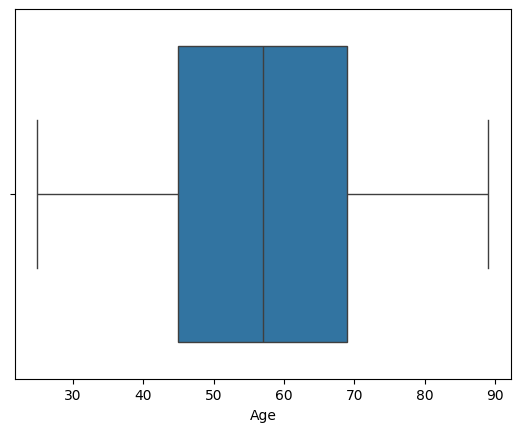

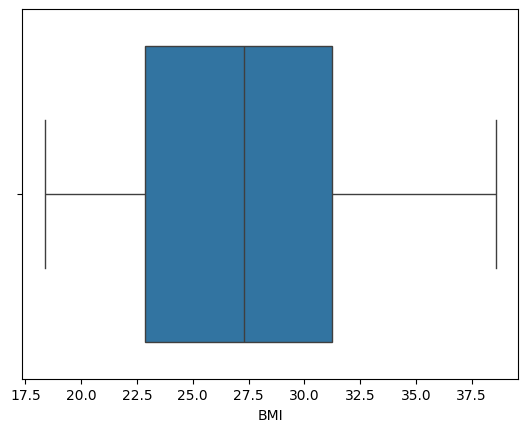

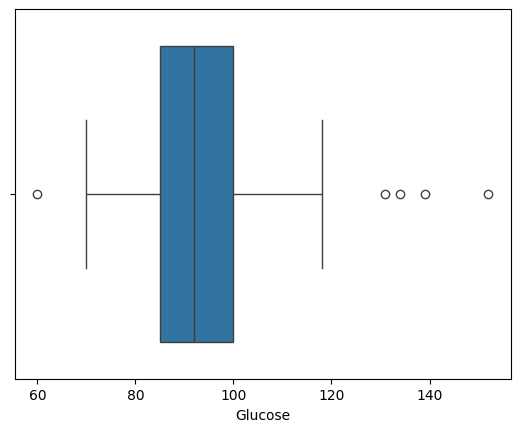

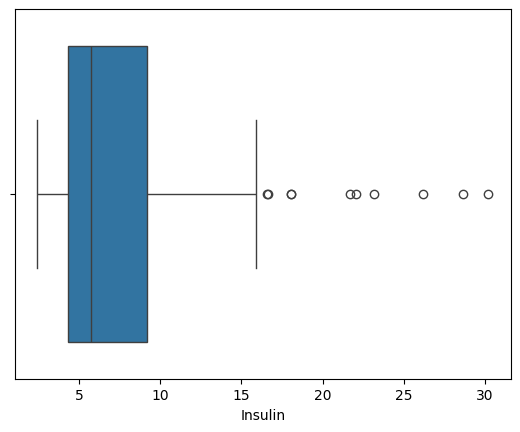

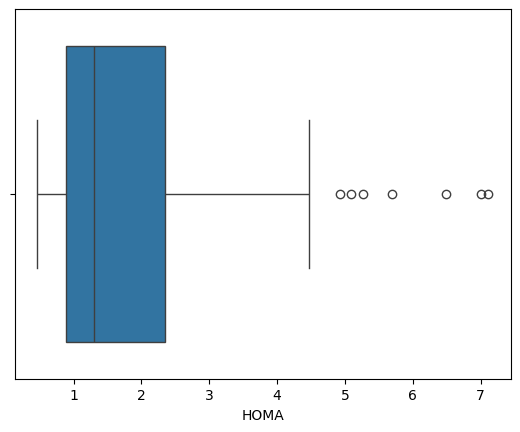

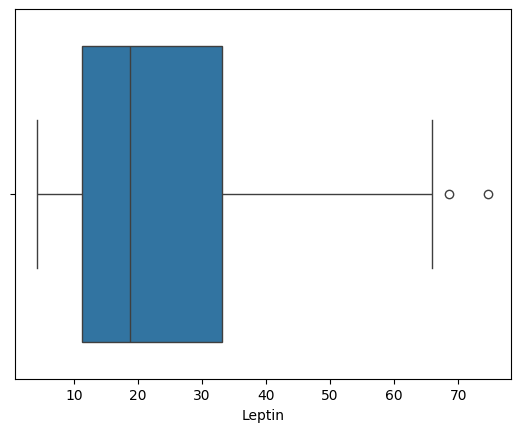

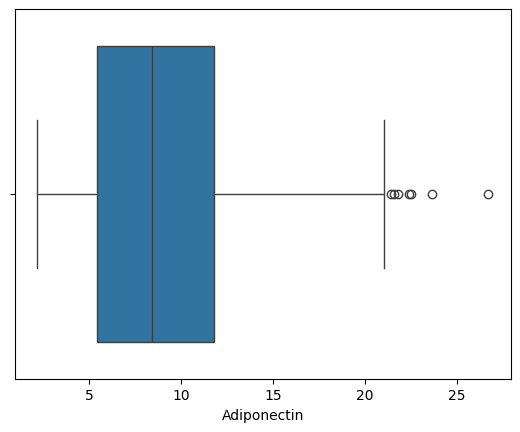

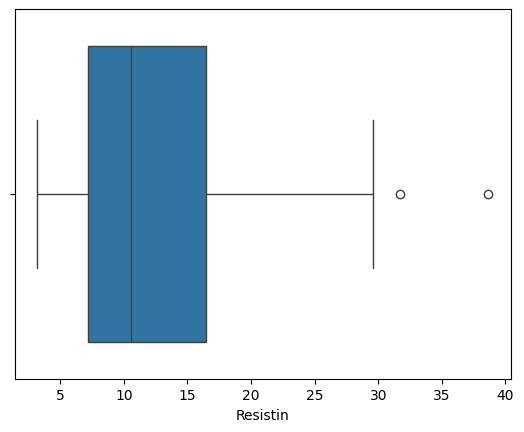

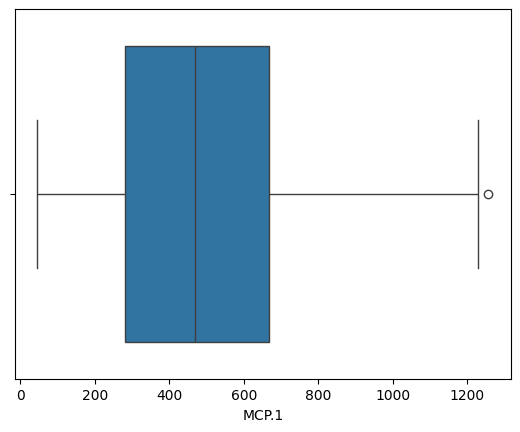

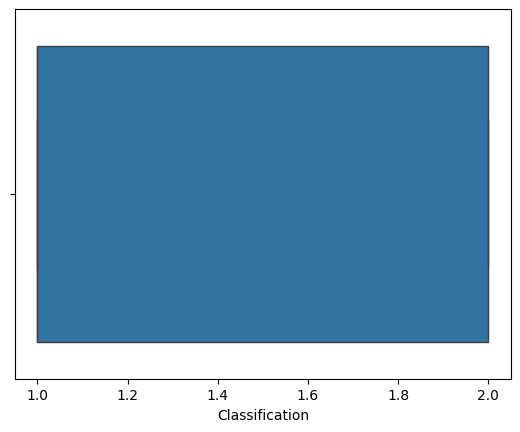

In [ ]:
# prompt: print the outliers graph after removing outliers from breast_cancer.csv

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Define a function to remove outliers using z-score
def remove_outliers(df, column, threshold=3):
  mean = df[column].mean()
  std = df[column].std()
  z_scores = (df[column] - mean) / std
  return df[(z_scores < threshold) & (z_scores > -threshold)]

# Remove outliers for each column in the breast cancer data
for column in breast_cancer_data.columns:
  breast_cancer_data = remove_outliers(breast_cancer_data, column)

# Print the breast cancer data after removing outliers
print(breast_cancer_data)

# Create a boxplot for each column in the breast cancer data
for column in breast_cancer_data.columns:
  sns.boxplot(x=breast_cancer_data[column])
  plt.show()


Perform Correlation for breast_cancer.csv

In [ ]:
# prompt: perform correlation  for breast_cancer.csv

# Calculate the correlation matrix for the breast cancer data
correlation_matrix = breast_cancer_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                     Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000 -0.026728  0.179051 -0.060453 -0.017804 -0.074056   
BMI            -0.026728  1.000000  0.102855  0.278411  0.263548  0.615589   
Glucose         0.179051  0.102855  1.000000  0.211039  0.379593  0.130194   
Insulin        -0.060453  0.278411  0.211039  1.000000  0.977931  0.323943   
HOMA           -0.017804  0.263548  0.379593  0.977931  1.000000  0.309422   
Leptin         -0.074056  0.615589  0.130194  0.323943  0.309422  1.000000   
Adiponectin    -0.203115 -0.237830  0.010321  0.088671  0.096095 -0.066614   
Resistin       -0.201733  0.164611 -0.060832  0.139112  0.113212  0.171011   
MCP.1          -0.015795  0.293979 -0.090189  0.176137  0.153689  0.121803   
Classification -0.106019 -0.198508  0.383559  0.141236  0.192599 -0.092808   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.203115 -0.201733 -0.015795       -0.106019  
BMI      

Perform separate Independent features and target variables for breast_cancer.csv

In [ ]:
# prompt: do separate independent features and target variables for breast_cancer.csv

# Print the available columns to identify the correct target variable name
print(breast_cancer_data.columns)

# Separate independent features and target variable for breast cancer data
# Replace "Class" with the actual name if it differs
X = breast_cancer_data.drop("Glucose", axis=1)
y = breast_cancer_data["Glucose"]  # Update with the actual target variable name

# Print the independent features
print(X)

# Print the target variable
print(y)

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')
     Age        BMI  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0     48  23.500000    2.707  0.467409   8.8071     9.702400   7.99585   
1     83  20.690495    3.115  0.706897   8.8438     5.429285   4.06405   
2     82  23.124670    4.498  1.009651  17.9393    22.432040   9.27715   
3     68  21.367521    3.226  0.612725   9.8827     7.169560  12.76600   
4     86  21.111111    3.549  0.805386   6.6994     4.819240  10.57635   
..   ...        ...      ...       ...      ...          ...       ...   
108   68  35.560000    8.150  2.633537  17.8700    11.900000   4.19000   
109   75  30.480000    7.010  2.628283  50.5300    10.060000  11.73000   
111   45  26.850000    3.330  0.755688  54.6800    12.100000  10.96000   
112   62  26.840000    4.530  1.117400  12.4500    21.420000   7.32000   
113   65  32.050000    5.730  1.370998  6

Perform normalization and standardization for breast_cancer.csv

In [ ]:
# prompt: perform normalization and standardization for breast_cancer.csv

# Normalize the breast cancer data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Print the normalized data
print(X_normalized)

# Standardize the breast cancer data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Print the standardized data
print(X_standardized)


[[0.359375   0.25385033 0.00989921 0.         0.06386878 0.3061325
  0.1350291  0.30677469 0.        ]
 [0.90625    0.11482618 0.02458603 0.03604309 0.06439011 0.13190255
  0.02409637 0.34947035 0.        ]
 [0.890625   0.23527771 0.07437005 0.08160759 0.19359508 0.82516477
  0.17118    0.4204571  0.        ]
 [0.671875   0.14832783 0.02858171 0.02187013 0.07914808 0.20285969
  0.26961524 0.72909258 0.        ]
 [0.953125   0.13563976 0.04020878 0.05086572 0.03392811 0.10702887
  0.20783594 0.6015972  0.        ]
 [0.375      0.22190664 0.02858171 0.03983413 0.03580748 0.46830307
  0.20053551 0.40038918 0.        ]
 [1.         0.21426353 0.0812815  0.06371857 0.03768685 0.13844996
  0.27441448 1.         0.        ]
 [0.796875   0.26869538 0.14535637 0.21307708 0.         0.45083447
  0.05344341 0.19405325 0.        ]
 [0.75       0.17962509 0.03304536 0.05028733 0.00225865 0.33289318
  0.08674326 0.07520161 0.        ]
 [0.78125    0.22910858 0.09071274 0.08223795 0.18205606 0.382647

Read and Print diabetes.csv

In [ ]:
# prompt: read and print diabetes.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Print the diabetes data
print(diabetes_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

read null values from diabetes.csv

In [ ]:
# prompt: read null values from diabetes.csv

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Count the number of null values in each column
null_values = diabetes_data.isnull().sum()

# Print the number of null values
print(null_values)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Perform statistical analysis for diabetes.csv

In [ ]:
# prompt: perform statistical analysis for diabetes.csv

import pandas as pd
import os

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Calculate descriptive statistics for the diabetes data
descriptive_stats = diabetes_data.describe()

# Print the descriptive statistics
print("Descriptive statistics:")
print(descriptive_stats)

# Calculate the correlation matrix for the diabetes data
correlation_matrix = diabetes_data.corr()

# Print the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Select only numerical columns for outlier detection
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)

# Remove the outliers from the original DataFrame
diabetes_data_without_outliers = diabetes_data[~diabetes_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(diabetes_data_without_outliers)

# Replace "Outcome" with the actual name of your target variable
X = diabetes_data.drop("Outcome", axis=1)  # Update with your target variable
y = diabetes_data["Outcome"]  # Update with your target variable

# Print the independent features
print("\nIndependent features:")
print(X)

# Print the target variable
print("\nTarget variable:")
print(y)

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print("\nNormalized data:")
print(X_normalized)

# Select only numerical columns for standardization
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print("\nStandardized data:")
print(X_standardized)


Descriptive statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

Check the Outliers from diabetes.csv

In [1]:
# prompt: check the outliers for diabetes.csv

# Select only numerical columns for outlier detection
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)


NameError: name 'diabetes_data' is not defined

remove the outliers from diabetes.csv

In [ ]:
# prompt: remove the outliers from diabetes.csv

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Select only numerical columns for outlier detection
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Remove the outliers from the original DataFrame
diabetes_data_without_outliers = diabetes_data[~diabetes_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(diabetes_data_without_outliers)



DataFrame without outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50  

Print the dataset after removal of outliers fron diabetes.csv

In [ ]:
# prompt: print the dataset after removal of outliers from diabetes.csv

print("\nDataFrame without outliers:")
print(diabetes_data_without_outliers)



DataFrame without outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50  

perform correlation for diabetes.csv

In [ ]:
# prompt: perform correlation for diabetes.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Select only numerical columns for correlation calculation
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

perform separate independent features and target variables for diabetes.csv


In [ ]:
# prompt:  perform separate independent features and target variables for diabetes.csv

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Separate independent features and target variable
X = diabetes_data.drop("Outcome", axis=1)  # Replace "Outcome" with the actual name of your target variable
y = diabetes_data["Outcome"]  # Replace "Outcome" with the actual name of your target variable

# Print the independent features
print(X)

# Print the target variable
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


perform normalization for diabetes.csv

In [ ]:
# prompt: perform normalization for diabetes.csv

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print(X_normalized)


[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


perform standardization for diabetes.csv

In [ ]:
# prompt: perform standardization for diabetes.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the diabetes data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Select only numerical columns for standardization
numerical_data = diabetes_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print(X_standardized)


[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


read and print heart.csv

In [ ]:
# prompt: read and print heart.csv

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Print the heart data
print(heart_data)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

read null values from heart.csv

In [ ]:
# prompt: read null values from heart.csv

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Check for null values
null_values = heart_data.isnull().sum()

# Print the number of null values in each column
print(null_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


 perform statistical anlysis for heart.csv

In [ ]:
# prompt: perform statistical anlysis for heart.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Calculate descriptive statistics for the heart data
descriptive_stats = heart_data.describe()

# Print the descriptive statistics
print("Descriptive statistics:")
print(descriptive_stats)

# Calculate the correlation matrix for the heart data
correlation_matrix = heart_data.corr()

# Print the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Select only numerical columns for outlier detection
numerical_data = heart_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)

# Remove the outliers from the original DataFrame
heart_data_without_outliers = heart_data[~heart_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(heart_data_without_outliers)

# Separate independent features and target variable
X = heart_data.drop("target", axis=1)  # Replace "target" with the actual name of your target variable
y = heart_data["target"]  # Replace "target" with the actual name of your target variable

# Print the independent features
print("\nIndependent features:")
print(X)

# Print the target variable
print("\nTarget variable:")
print(y)

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print("\nNormalized data:")
print(X_normalized)

# Select only numerical columns for standardization
numerical_data = heart_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print("\nStandardized data:")
print(X_standardized)


Descriptive statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std

check outliers in heart.csv

In [ ]:
# prompt: check outliers in heart.csv

import pandas as pd
from scipy import stats

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Select only numerical columns for outlier detection
numerical_data = heart_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)



Number of outliers in numerical data: 16

Outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
48    53    0   2       128   216    0        0      115      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
204   62    0   0       160   164    0        0      145      0      6.2   
220   63    0   0       150   407    0        0      154      0      4.0   
221   55    1   0       140   217    0        1      111      1      5.6   
223   56    0   0       200   288    1        0      133      1      4.0   
246   56    0   0       134   409  

remove the outliers in heart.csv

In [ ]:
# prompt: remove the outliers in heart.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Select only numerical columns for outlier detection
numerical_data = heart_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Remove the outliers from the original DataFrame
heart_data_without_outliers = heart_data[~heart_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(heart_data_without_outliers)



DataFrame without outliers:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       

 print the outliers after removal from heart.csv

In [ ]:
# prompt: print the outliers after removal from heart.csv

# Print the outliers after removal from heart.csv
print("\nOutliers after removal:")
print(outliers_numerical)



Outliers after removal:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
48    53    0   2       128   216    0        0      115      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
204   62    0   0       160   164    0        0      145      0      6.2   
220   63    0   0       150   407    0        0      154      0      4.0   
221   55    1   0       140   217    0        1      111      1      5.6   
223   56    0   0       200   288    1        0      133      1      4.0   
246   56    0   0       134   409    0        0      150      1

 perform correlation for heart.csv

In [ ]:
# prompt: perform correlation for heart.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Select only numerical columns for correlation calculation
numerical_data = heart_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

separate independent features and target variables for heart.csv

In [ ]:
# prompt: separate independent features and target variables for heart.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Separate independent features and target variable
X = heart_data.drop("target", axis=1)  # Replace "target" with the actual name of your target variable
y = heart_data["target"]  # Replace "target" with the actual name of your target variable

# Print the independent features
print(X)

# Print the target variable
print(y)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

perform normalization for heart.csv

In [ ]:
# prompt: perform normalization for heart.csv

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print(X_normalized)


[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


perform standardization for heart.csv

In [ ]:
# prompt: perform standardization for heart.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the heart data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Select only numerical columns for standardization
numerical_data = heart_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print(X_standardized)


[[ 0.9521966   0.68100522  1.97312292 ... -0.71442887 -2.14887271
   0.91452919]
 [-1.91531289  0.68100522  1.00257707 ... -0.71442887 -0.51292188
   0.91452919]
 [-1.47415758 -1.46841752  0.03203122 ... -0.71442887 -0.51292188
   0.91452919]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  1.24459328  1.12302895
  -1.09345881]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.26508221  1.12302895
  -1.09345881]
 [ 0.29046364 -1.46841752  0.03203122 ...  0.26508221 -0.51292188
  -1.09345881]]


 read and print iris.csv

In [ ]:
# prompt: read and print iris.csv

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the iris data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Print the iris data
print(iris_data)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


 read null values from iris.csv

In [ ]:
# prompt: read null values from iris.csv

iris_data.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


perform statistical analysis for iris.csv

In [ ]:
# prompt: perform statistical analysis for iris.csv

# Calculate descriptive statistics for the iris data
descriptive_stats = iris_data.describe()

# Print the descriptive statistics
print("Descriptive statistics:")
print(descriptive_stats)

# Calculate the correlation matrix for the iris data
correlation_matrix = iris_data.select_dtypes(include=['number']).corr()

# Print the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

# Select only numerical columns for outlier detection
numerical_data = iris_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)

# Remove the outliers from the original DataFrame
iris_data_without_outliers = iris_data[~iris_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(iris_data_without_outliers)

# Separate independent features and target variable
X = iris_data.drop("species", axis=1)  # Replace "species" with the actual name of your target variable
y = iris_data["species"]  # Replace "species" with the actual name of your target variable

# Print the independent features
print("\nIndependent features:")
print(X)

# Print the target variable
print("\nTarget variable:")
print(y)

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print("\nNormalized data:")
print(X_normalized)

# Select only numerical columns for standardization
numerical_data = iris_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print("\nStandardized data:")
print(X_standardized)


Descriptive statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

Number of outliers in numerical data: 1

Outliers:
    sepal_length  sepal_widt

check the outliers from iris.csv

In [ ]:
# prompt: check the outliers from iris.csv

# Select only numerical columns for outlier detection
numerical_data = iris_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)



Number of outliers in numerical data: 1

Outliers:
    sepal_length  sepal_width  petal_length  petal_width
15           5.7          4.4           1.5          0.4


 remove the outliers from iris.csv

In [ ]:
# prompt: remove rhe outliers from iris.csv

# Remove the outliers from the original DataFrame
iris_data_without_outliers = iris_data[~iris_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(iris_data_without_outliers)



DataFrame without outliers:
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[149 rows x 5 columns]


after removal of outliers print the outliers from iris.csv

In [ ]:
# prompt: after removal of outliers print the outliers from iris.csv

print("\nOutliers after removal:")
print(outliers_numerical)



Outliers after removal:
    sepal_length  sepal_width  petal_length  petal_width
15           5.7          4.4           1.5          0.4


 perform correlation for iris.csv

In [ ]:
# prompt: perform correlation for iris.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the iris data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Select only numerical columns for correlation calculation
numerical_data = iris_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


separate independent features and target variables for iris.csv

In [ ]:
# prompt: separate independent features and target variables for iris.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the iris data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Separate independent features and target variable
X = iris_data.drop("species", axis=1)  # Replace "species" with the actual name of your target variable
y = iris_data["species"]  # Replace "species" with the actual name of your target variable

# Print the independent features
print(X)

# Print the target variable
print(y)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


perform normalization for iris.csv

In [ ]:
# prompt: perform normalization for iris.csv

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print(X_normalized)


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

 perform standardization for iris.csv

In [ ]:
# prompt: perform standardization for iris.csv

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the iris data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Select only numerical columns for standardization
numerical_data = iris_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print(X_standardized)


[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

read and print thyroid_csv.xlsx

In [ ]:
!pip install openpyxl

from google.colab import drive
import pandas as pd
import os

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Print the thyroid data
print(thyroid_data)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.9 MB/s eta 0:00:00
      on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0                0                   0                          0   
1                0                   0                          0   
2                0                   0                          0   
3                0                   0                          0   
4                0                   0                          0   
...            ...                 ...                        ...   
3147             0                   0                          0   
3148             1                   0                          0   
3149             0                   0                          0   
3150             1                   0                          0   
3151             0                   0                          0   

      thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
0          

 read null values from thyroid_csv.xlsx

In [ ]:
# prompt: read null values from thyroid_csv.xlsx

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Count the number of null values in each column
null_values = thyroid_data.isnull().sum()

# Print the number of null values
print(null_values)


on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
T3_measured                  0
TT4_measured                 0
T4U_measured                 0
FTI_measured                 0
age                          0
sex                          0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
classes                      0
dtype: int64


 perform statistical anlysis for thyroid_csv.xlsx

In [ ]:
# prompt: perform statistical anlysis for thyroid_csv.xlsx

import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Calculate descriptive statistics for the thyroid data
descriptive_stats = thyroid_data.describe()

# Print the descriptive statistics
print("Descriptive statistics:")
print(descriptive_stats)

# Select only numerical columns for outlier detection
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)

# Remove the outliers from the original DataFrame
thyroid_data_without_outliers = thyroid_data[~thyroid_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(thyroid_data_without_outliers)

# Check column names and identify the correct target variable column
print(thyroid_data.columns)

# Separate independent features and target variable
# Replace 'Classification' with the actual name of your target variable column
X = thyroid_data.drop("classes", axis=1) # Replace 'Classification' with the correct column name
y = thyroid_data["classes"] # Replace 'Classification' with the correct column name

# Print the independent features
print("\nIndependent features:")
print(X)

# Print the target variable
print("\nTarget variable:")
print(y)

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print("\nNormalized data:")
print(X_normalized)

# Select only numerical columns for standardization
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print("\nStandardized data:")
print(X_standardized)

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print("\nCorrelation matrix:")
print(correlation_matrix)

Descriptive statistics:
       on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
count   3152.000000         3152.000000                3152.000000   
mean       0.145305            0.017449                   0.013325   
std        0.352464            0.130959                   0.114680   
min        0.000000            0.000000                   0.000000   
25%        0.000000            0.000000                   0.000000   
50%        0.000000            0.000000                   0.000000   
75%        0.000000            0.000000                   0.000000   
max        1.000000            1.000000                   1.000000   

       thyroid_surgery  query_hypothyroid  query_hyperthyroid     pregnant  \
count      3152.000000        3152.000000         3152.000000  3152.000000   
mean          0.032995           0.075825            0.077094     0.019987   
std           0.178652           0.264760            0.266783     0.139979   
min           0.000000           

check outliers from thyroid_csv.xlsx

In [ ]:
# prompt: check outliers from thyroid_csv.xlsx

import pandas as pd
import os
import scipy.stats as stats

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Select only numerical columns for outlier detection
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Print the number of outliers in the numerical data
print("\nNumber of outliers in numerical data:", len(outliers_numerical))

# Print the outliers in the numerical data
print("\nOutliers:")
print(outliers_numerical)



Number of outliers in numerical data: 1364

Outliers:
      on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0                0                   0                          0   
1                0                   0                          0   
2                0                   0                          0   
3                0                   0                          0   
4                0                   0                          0   
...            ...                 ...                        ...   
3142             0                   0                          0   
3144             0                   0                          0   
3146             0                   0                          0   
3148             1                   0                          0   
3149             0                   0                          0   

      thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
0                   0               

remove the outliers from thyroid_csv.xlsx

In [ ]:
# prompt: remove the outliers from thyroid_csv.xlsx

import pandas as pd

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Select only numerical columns for outlier detection
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Calculate the z-score for each numerical column
z_scores = stats.zscore(numerical_data)

# Define a threshold for outlier detection
threshold = 3

# Identify outliers in the numerical data
outliers_numerical = numerical_data[(abs(z_scores) > threshold).any(axis=1)]

# Remove the outliers from the original DataFrame
thyroid_data_without_outliers = thyroid_data[~thyroid_data.index.isin(outliers_numerical.index)]

# Print the updated DataFrame without outliers
print("\nDataFrame without outliers:")
print(thyroid_data_without_outliers)



DataFrame without outliers:
      on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
288              0                   0                          0   
289              0                   0                          0   
291              0                   0                          0   
292              0                   0                          0   
293              0                   0                          0   
...            ...                 ...                        ...   
3143             0                   0                          0   
3145             0                   0                          0   
3147             0                   0                          0   
3150             1                   0                          0   
3151             0                   0                          0   

      thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
288                 0                  0                   0  

 perform correlation for thyroid_csv.xlsx

In [ ]:
# prompt: perform correlation for thyroid_csv.xlsx

import pandas as pd
from scipy import stats

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Select only numerical columns for correlation calculation
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical data
correlation_matrix = numerical_data.corr()

# Print the correlation matrix
print(correlation_matrix)


                           on_thyroxine  query_on_thyroxine  \
on_thyroxine                   1.000000           -0.013694   
query_on_thyroxine            -0.013694            1.000000   
on_antithyroid_medication     -0.024361           -0.015487   
thyroid_surgery                0.029677            0.016078   
query_hypothyroid              0.065542           -0.019865   
query_hyperthyroid            -0.088794           -0.038516   
pregnant                      -0.000992           -0.019031   
sick                          -0.063045           -0.023746   
tumor                         -0.022618            0.049831   
lithium                       -0.010389           -0.003358   
goitre                        -0.022634            0.003786   
TSH_measured                   0.075360           -0.108325   
T3_measured                   -0.161119           -0.087069   
TT4_measured                   0.060680            0.039029   
T4U_measured                   0.060306            0.03

separate independent features and target variables for thyroid_csv.xlsx

In [ ]:
# prompt: separate independent features and target variables for thyroid_csv.xlsx

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Check column names and identify the correct target variable column
print(thyroid_data.columns)

# Separate independent features and target variable
# Replace 'Classification' with the actual name of your target variable column
X = thyroid_data.drop("classes", axis=1) # Replace 'Classification' with the correct column name
y = thyroid_data["classes"] # Replace 'Classification' with the correct column name

# Print the independent features
print("\nIndependent features:")
print(X)

# Print the target variable
print("\nTarget variable:")
print(y)


Index(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
       'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured',
       'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'age',
       'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'classes'],
      dtype='object')

Independent features:
      on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0                0                   0                          0   
1                0                   0                          0   
2                0                   0                          0   
3                0                   0                          0   
4                0                   0                          0   
...            ...                 ...                        ...   
3147             0                   0                          0   
3148             1                   0            

perform normalization for thyroid_csv.xlsx

In [ ]:
# prompt: perform normalization for thyroid_csv.xlsx

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming 'X' is your DataFrame with independent features
# Select only numerical columns for normalization
X_numerical = X.select_dtypes(include=['number'])

# Normalize the numerical data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_numerical)

# Print the normalized data
print(X_normalized)


[[0.         0.         0.         ... 0.22991071 0.39819005 0.13620885]
 [0.         0.         0.         ... 0.21428571 0.36651584 0.13734393]
 [0.         0.         0.         ... 0.265625   0.50226244 0.12372304]
 ...
 [0.         0.         0.         ... 0.23214286 0.46606335 0.1123723 ]
 [1.         0.         0.         ... 0.53125    0.4841629  0.25312145]
 [0.         0.         0.         ... 0.27008929 0.4479638  0.14074915]]


 perform standardization for thyroid_csv.xlsx

In [ ]:
 # prompt: perform standardization for thyroid_csv.xlsx

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Change the path to point to your AG4 dataset folder on Google Drive.
data_path = "/content/drive/My Drive/AG4"

# Read the thyroid data from the Excel file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Select only numerical columns for standardization
numerical_data = thyroid_data.select_dtypes(include=['number'])

# Standardize the numerical data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(numerical_data)

# Print the standardized data
print(X_standardized)


[[-0.41231957 -0.13326335 -0.11621025 ... -0.44065419  0.08794471
   3.15348132]
 [-0.41231957 -0.13326335 -0.11621025 ... -0.73930552  0.10488848
   3.15348132]
 [-0.41231957 -0.13326335 -0.11621025 ...  0.54062875 -0.09843673
   3.15348132]
 ...
 [-0.41231957 -0.13326335 -0.11621025 ...  0.19931295 -0.26787441
  -0.31710985]
 [ 2.42530329 -0.13326335 -0.11621025 ...  0.36997085  1.83315282
  -0.31710985]
 [-0.41231957 -0.13326335 -0.11621025 ...  0.02865504  0.15571979
  -0.31710985]]


Feature selection for BGEO-TVFL

KNN for breast_cancer.csv using BGEO-TVFL

In [ ]:
#KNN for breast_cancer.csv using BGEO-TVFL
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values  # Use breast_cancer_data instead of data
y = breast_cancer_data.iloc[:, -1].values   # Use breast_cancer_data instead of data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGEOTVFL Parameters
num_eagles = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize eagles' positions
eagles_position = np.random.randint(2, size=(num_eagles, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGEOTVFL Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
all_solutions = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_eagles):
        # Evaluate fitness of the current position
        score = fitness_knn(eagles_position[i])
        all_scores.append(score)
        all_solutions.append(eagles_position[i].copy())

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = eagles_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = eagles_position[i].copy()

        # Apply the BGEOTVFL algorithm logic
        l = 0.05 + (0.95 - 0.05) * (iteration / max_iter)
        if np.random.rand() < 0.5:
            new_position = best_solution - l * np.abs(best_solution - eagles_position[i])
        else:
            new_position = best_solution + l * np.abs(best_solution - eagles_position[i])

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        eagles_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 0 0 0 0 1 1]
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 1 1 0 0 0 0 1 1]
Iteration 2: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 0 1 0 0 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 0 1 0 0 1 1]
Iteration 3: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 1 1 0 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 0 1 0 0 1 1]
Iteration 4: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 0 1 0 0 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 0 1 0 0 1 1]
Iteration 5: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 0 1 0 0 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 0 1 0 0 1 1]
Iteration 6: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 0 1 0 0 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 0 1 0 0 1 1]
Iteration 

KNN for diabetes.csv using BGEO-TVFL

In [ ]:
#KNN for diabetes.csv using BGEO-TVFL
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Assuming the last column is the target variable and the rest are features
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGEOTVFL Parameters
num_eagles = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize eagles' positions
eagles_position = np.random.randint(2, size=(num_eagles, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGEOTVFL Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
all_solutions = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_eagles):
        # Evaluate fitness of the current position
        score = fitness_knn(eagles_position[i])
        all_scores.append(score)
        all_solutions.append(eagles_position[i].copy())

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = eagles_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = eagles_position[i].copy()

        # Apply the BGEOTVFL algorithm logic
        l = 0.05 + (0.95 - 0.05) * (iteration / max_iter)
        if np.random.rand() < 0.5:
            new_position = best_solution - l * np.abs(best_solution - eagles_position[i])
        else:
            new_position = best_solution + l * np.abs(best_solution - eagles_position[i])

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        eagles_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 2: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 1 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.7403, Best Solution = [1 1 1 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7403, Overall Best Solution = [1 1 1 0 0 1 1 1]
Iteration 7: Best Score (Accuracy)

KNN for heart.csv using BGEO-TVFL

In [ ]:
#KNN for heart.csv using BGEO-TVFL
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Assuming the last column is the target variable and the rest are features
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGEOTVFL Parameters
num_eagles = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize eagles' positions
eagles_position = np.random.randint(2, size=(num_eagles, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGEOTVFL Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
all_solutions = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_eagles):
        # Evaluate fitness of the current position
        score = fitness_knn(eagles_position[i])
        all_scores.append(score)
        all_solutions.append(eagles_position[i].copy())

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = eagles_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = eagles_position[i].copy()

        # Apply the BGEOTVFL algorithm logic
        l = 0.05 + (0.95 - 0.05) * (iteration / max_iter)
        if np.random.rand() < 0.5:
            new_position = best_solution - l * np.abs(best_solution - eagles_position[i])
        else:
            new_position = best_solution + l * np.abs(best_solution - eagles_position[i])

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        eagles_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8852, Best Solution = [0 1 1 0 0 0 0 1 1 0 0 1 1]
Overall Best Score (Accuracy) = 0.8852, Overall Best Solution = [0 1 1 0 0 0 0 1 1 0 0 1 1]
Iteration 2: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overal

KNN for iris.csv using BGEO-TVFL

In [ ]:
#KNN for iris.csv using BGEO-TVFL
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Assuming the last column is the target variable and the rest are features
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGEOTVFL Parameters
num_eagles = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize eagles' positions
eagles_position = np.random.randint(2, size=(num_eagles, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGEOTVFL Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
all_solutions = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_eagles):
        # Evaluate fitness of the current position
        score = fitness_knn(eagles_position[i])
        all_scores.append(score)
        all_solutions.append(eagles_position[i].copy())

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = eagles_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = eagles_position[i].copy()

        # Apply the BGEOTVFL algorithm logic
        l = 0.05 + (0.95 - 0.05) * (iteration / max_iter)
        if np.random.rand() < 0.5:
            new_position = best_solution - l * np.abs(best_solution - eagles_position[i])
        else:
            new_position = best_solution + l * np.abs(best_solution - eagles_position[i])

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        eagles_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 1.0000, Best Solution = [0 0 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 2: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 3: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 4: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 5: Best Score (Accuracy) = 1.0000, Best Solution = [0 0 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 6: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 0 1 1]
Iteration 7: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Soluti

KNN for thyroid.csv using BGEO-TVFL

In [ ]:
#KNN for thyroid.csv using BGEO-TVFL
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming the last column is the target variable and the rest are features
# Drop non-numerical columns before scaling
X = thyroid_data.select_dtypes(include=np.number).iloc[:, :-1].values
y = thyroid_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGEOTVFL Parameters
num_eagles = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize eagles' positions
eagles_position = np.random.randint(2, size=(num_eagles, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGEOTVFL Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
all_solutions = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_eagles):
        # Evaluate fitness of the current position
        score = fitness_knn(eagles_position[i])
        all_scores.append(score)
        all_solutions.append(eagles_position[i].copy())

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = eagles_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = eagles_position[i].copy()

        # Apply the BGEOTVFL algorithm logic
        l = 0.05 + (0.95 - 0.05) * (iteration / max_iter)
        if np.random.rand() < 0.5:
            new_position = best_solution - l * np.abs(best_solution - eagles_position[i])
        else:
            new_position = best_solution + l * np.abs(best_solution - eagles_position[i])

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        eagles_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9556, Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Overall Best Score (Accuracy) = 0.9556, Overall Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Iteration 2: Best Score (Accuracy) = 0.9493, Best Solution = [1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1]
Overall Best Score (Accuracy) = 0.9556, Overall Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Iteration 3: Best Score (Accuracy) = 0.9556, Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Overall Best Score (Accuracy) = 0.9556, Overall Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Iteration 4: Best Score (Accuracy) = 0.9556, Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Overall Best Score (Accuracy) = 0.9556, Overall Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Iteration 5: Best Score (Accuracy) = 0.9556, Best Solution = [0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1]
Overall

KNN for breast_cancer.csv using BWOA

In [ ]:
#KNN for breast_cancer.csv using BWOA
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values  # Use breast_cancer_data instead of data
y = breast_cancer_data.iloc[:, -1].values   # Use breast_cancer_data instead of data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BWOA Parameters
num_whales = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize whales' positions
whales_position = np.random.randint(2, size=(num_whales, dimension))

# Fitness function: accuracy of K-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BWOA Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_whales):
        # Evaluate fitness of the current position
        score = fitness_knn(whales_position[i])
        all_scores.append(score)

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = whales_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = whales_position[i].copy()

        # Apply the BWOA algorithm logic
        l = -1 + (1 - (-1)) * (iteration / max_iter)
        p = np.random.rand()
        if p < 0.5:
            if np.abs(l) < 0.5:
                D = np.abs(2 * np.random.rand() * best_solution - whales_position[i])
                new_position = best_solution - l * D
            else:
                random_whale = whales_position[np.random.randint(0, num_whales)]
                D = np.abs(2 * np.random.rand() * random_whale - whales_position[i])
                new_position = random_whale - l * D
        else:
            distance_to_leader = np.abs(best_solution - whales_position[i])
            new_position = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + best_solution

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        whales_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9167, Best Solution = [1 1 1 1 0 1 1 1 0]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 2: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 3: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 4: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 5: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 6: Best Score (Accuracy) = 0.8333, Best Solution = [1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1 1 1 1 0 1 1 1 0]
Iteration 

KNN for diabetes.csv using BWOA

In [ ]:
#KNN for diabetes.csv using BWOA
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Assuming the last column is the target variable and the rest are features
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BWOA Parameters
num_whales = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize whales' positions
whales_position = np.random.randint(2, size=(num_whales, dimension))

# Fitness function: accuracy of K-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BWOA Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_whales):
        # Evaluate fitness of the current position
        score = fitness_knn(whales_position[i])
        all_scores.append(score)

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = whales_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = whales_position[i].copy()

        # Apply the BWOA algorithm logic
        l = -1 + (1 - (-1)) * (iteration / max_iter)
        p = np.random.rand()
        if p < 0.5:
            if np.abs(l) < 0.5:
                D = np.abs(2 * np.random.rand() * best_solution - whales_position[i])
                new_position = best_solution - l * D
            else:
                random_whale = whales_position[np.random.randint(0, num_whales)]
                D = np.abs(2 * np.random.rand() * random_whale - whales_position[i])
                new_position = random_whale - l * D
        else:
            distance_to_leader = np.abs(best_solution - whales_position[i])
            new_position = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + best_solution

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        whales_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.7468, Best Solution = [0 1 0 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 2: Best Score (Accuracy) = 0.6948, Best Solution = [1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.6948, Best Solution = [1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.6948, Best Solution = [1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.6948, Best Solution = [1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.6948, Best Solution = [1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.7468, Overall Best Solution = [0 1 0 0 0 1 1 1]
Iteration 7: Best Score (Accuracy)

KNN for heart.csv using BWOA

In [ ]:
#KNN for heart.csv using BWOA
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Assuming the last column is the target variable and the rest are features
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BWOA Parameters
num_whales = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize whales' positions
whales_position = np.random.randint(2, size=(num_whales, dimension))

# Fitness function: accuracy of K-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BWOA Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_whales):
        # Evaluate fitness of the current position
        score = fitness_knn(whales_position[i])
        all_scores.append(score)

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = whales_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = whales_position[i].copy()

        # Apply the BWOA algorithm logic
        l = -1 + (1 - (-1)) * (iteration / max_iter)
        p = np.random.rand()
        if p < 0.5:
            if np.abs(l) < 0.5:
                D = np.abs(2 * np.random.rand() * best_solution - whales_position[i])
                new_position = best_solution - l * D
            else:
                random_whale = whales_position[np.random.randint(0, num_whales)]
                D = np.abs(2 * np.random.rand() * random_whale - whales_position[i])
                new_position = random_whale - l * D
        else:
            distance_to_leader = np.abs(best_solution - whales_position[i])
            new_position = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + best_solution

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        whales_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8852, Best Solution = [1 0 1 1 1 0 0 1 1 0 1 0 1]
Overall Best Score (Accuracy) = 0.8852, Overall Best Solution = [1 0 1 1 1 0 0 1 1 0 1 0 1]
Iteration 2: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.9016, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1]
Overal

knn for iris.csv using BWOA

In [ ]:
#knn for iris.csv using BWOA
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Assuming the last column is the target variable and the rest are features
X = iris_data.iloc[:, :-1].values
y =iris_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BWOA Parameters
num_whales = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize whales' positions
whales_position = np.random.randint(2, size=(num_whales, dimension))

# Fitness function: accuracy of K-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BWOA Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_whales):
        # Evaluate fitness of the current position
        score = fitness_knn(whales_position[i])
        all_scores.append(score)

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = whales_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = whales_position[i].copy()

        # Apply the BWOA algorithm logic
        l = -1 + (1 - (-1)) * (iteration / max_iter)
        p = np.random.rand()
        if p < 0.5:
            if np.abs(l) < 0.5:
                D = np.abs(2 * np.random.rand() * best_solution - whales_position[i])
                new_position = best_solution - l * D
            else:
                random_whale = whales_position[np.random.randint(0, num_whales)]
                D = np.abs(2 * np.random.rand() * random_whale - whales_position[i])
                new_position = random_whale - l * D
        else:
            distance_to_leader = np.abs(best_solution - whales_position[i])
            new_position = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + best_solution

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        whales_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 2: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 3: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 4: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 5: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 6: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1 1 1 1]
Iteration 7: Best Score (Accuracy) = 1.0000, Best Solution = [1 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Soluti

KNN for thyroid_csv.xlsx using BWOA

In [ ]:
#KNN for thyroid_csv.xlsx using BWOA
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming the last column is the target variable and the rest are features
# Drop non-numerical columns before scaling
X = thyroid_data.select_dtypes(include=np.number).iloc[:, :-1].values
y = thyroid_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BWOA Parameters
num_whales = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize whales' positions
whales_position = np.random.randint(2, size=(num_whales, dimension))

# Fitness function: accuracy of K-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BWOA Optimization Loop
best_solution = None
best_score = -1
worst_score = 1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_whales):
        # Evaluate fitness of the current position
        score = fitness_knn(whales_position[i])
        all_scores.append(score)

        # Update best and worst score
        if score > best_score:
            best_score = score
            best_solution = whales_position[i].copy()
        if score < worst_score:
            worst_score = score

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = whales_position[i].copy()

        # Apply the BWOA algorithm logic
        l = -1 + (1 - (-1)) * (iteration / max_iter)
        p = np.random.rand()
        if p < 0.5:
            if np.abs(l) < 0.5:
                D = np.abs(2 * np.random.rand() * best_solution - whales_position[i])
                new_position = best_solution - l * D
            else:
                random_whale = whales_position[np.random.randint(0, num_whales)]
                D = np.abs(2 * np.random.rand() * random_whale - whales_position[i])
                new_position = random_whale - l * D
        else:
            distance_to_leader = np.abs(best_solution - whales_position[i])
            new_position = distance_to_leader * np.exp(l) * np.cos(2 * np.pi * l) + best_solution

        # Convert position to binary based on thresholding
        new_position = 1 / (1 + np.exp(-new_position))
        new_position = np.where(new_position >= 0.5, 1, 0)

        # Update the position
        whales_position[i] = new_position

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", worst_score)
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9540, Best Solution = [0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1]
Overall Best Score (Accuracy) = 0.9540, Overall Best Solution = [0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1]
Iteration 2: Best Score (Accuracy) = 0.9382, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9540, Overall Best Solution = [0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1]
Iteration 3: Best Score (Accuracy) = 0.9382, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9540, Overall Best Solution = [0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1]
Iteration 4: Best Score (Accuracy) = 0.9382, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall Best Score (Accuracy) = 0.9540, Overall Best Solution = [0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1]
Iteration 5: Best Score (Accuracy) = 0.9382, Best Solution = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Overall

KNN for breast_cancer.csv using BGWO

In [ ]:
#KNN for breast_cancer.csv using BGWO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values
y = breast_cancer_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGWO Parameters
num_wolves = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize wolves' positions
wolves_position = np.random.randint(2, size=(num_wolves, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGWO Optimization Loop
alpha_position = np.zeros(dimension)
alpha_score = -1
beta_position = np.zeros(dimension)
beta_score = -1
delta_position = np.zeros(dimension)
delta_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_wolves):
        # Evaluate fitness of the current position
        score = fitness_knn(wolves_position[i])
        all_scores.append(score)

        # Update alpha, beta, and delta wolves
        if score > alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = score
            alpha_position = wolves_position[i].copy()
        elif score > beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = score
            beta_position = wolves_position[i].copy()
        elif score > delta_score:
            delta_score = score
            delta_position = wolves_position[i].copy()

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = wolves_position[i].copy()

    # Update positions of wolves
    for i in range(num_wolves):
        for j in range(dimension):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A1 = 2 * r1 - 1
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position[j] - wolves_position[i][j])
            X1 = alpha_position[j] - A1 * D_alpha

            r1 = np.random.rand()
            r2 = np.random.rand()
            A2 = 2 * r1 - 1
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position[j] - wolves_position[i][j])
            X2 = beta_position[j] - A2 * D_beta

            r1 = np.random.rand()
            r2 = np.random.rand()
            A3 = 2 * r1 - 1
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position[j] - wolves_position[i][j])
            X3 = delta_position[j] - A3 * D_delta

            wolves_position[i][j] = (X1 + X2 + X3) / 3

            # Apply sigmoid function to update position
            wolves_position[i][j] = 1 / (1 + np.exp(-wolves_position[i][j]))

            # Convert to binary
            wolves_position[i][j] = np.where(wolves_position[i][j] >= 0.5, 1, 0)

    # Calculate the average solution for this iteration

    if iteration_best_solution is not None:  # Check if a solution was found in this iteration
        average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {alpha_score:.4f}, Overall Best Solution = {alpha_position}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", alpha_position)
print("Final Best Accuracy:", alpha_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8333, Best Solution = [1 0 1 0 0 0 1 1 1]
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 2: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1 0 1 0 0 0 1 1 1]
Iteration 7: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score 

KNN for diabetes.csv using BGWO

In [ ]:
#KNN for diabetes.csv using BGWO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Assuming the last column is the target variable and the rest are features
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGWO Parameters
num_wolves = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize wolves' positions
wolves_position = np.random.randint(2, size=(num_wolves, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGWO Optimization Loop
alpha_position = np.zeros(dimension)
alpha_score = -1
beta_position = np.zeros(dimension)
beta_score = -1
delta_position = np.zeros(dimension)
delta_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_wolves):
        # Evaluate fitness of the current position
        score = fitness_knn(wolves_position[i])
        all_scores.append(score)

        # Update alpha, beta, and delta wolves
        if score > alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = score
            alpha_position = wolves_position[i].copy()
        elif score > beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = score
            beta_position = wolves_position[i].copy()
        elif score > delta_score:
            delta_score = score
            delta_position = wolves_position[i].copy()

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = wolves_position[i].copy()

    # Update positions of wolves
    for i in range(num_wolves):
        for j in range(dimension):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A1 = 2 * r1 - 1
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position[j] - wolves_position[i][j])
            X1 = alpha_position[j] - A1 * D_alpha

            r1 = np.random.rand()
            r2 = np.random.rand()
            A2 = 2 * r1 - 1
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position[j] - wolves_position[i][j])
            X2 = beta_position[j] - A2 * D_beta

            r1 = np.random.rand()
            r2 = np.random.rand()
            A3 = 2 * r1 - 1
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position[j] - wolves_position[i][j])
            X3 = delta_position[j] - A3 * D_delta

            wolves_position[i][j] = (X1 + X2 + X3) / 3

            # Apply sigmoid function to update position
            wolves_position[i][j] = 1 / (1 + np.exp(-wolves_position[i][j]))

            # Convert to binary
            wolves_position[i][j] = np.where(wolves_position[i][j] >= 0.5, 1, 0)

    # Calculate the average solution for this iteration

    if iteration_best_solution is not None:  # Check if a solution was found in this iteration
        average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {alpha_score:.4f}, Overall Best Solution = {alpha_position}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", alpha_position)
print("Final Best Accuracy:", alpha_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.7532, Best Solution = [0 1 1 0 0 0 1 0]
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 2: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 3: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 4: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 5: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 6: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.7532, Overall Best Solution = [0 1 1 0 0 0 1 0]
Iteration 7: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0

KNN for heart.csv using BGWO

In [ ]:
#KNN for heart.csv using BGWO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Assuming the last column is the target variable and the rest are features
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGWO Parameters
num_wolves = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize wolves' positions
wolves_position = np.random.randint(2, size=(num_wolves, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGWO Optimization Loop
alpha_position = np.zeros(dimension)
alpha_score = -1
beta_position = np.zeros(dimension)
beta_score = -1
delta_position = np.zeros(dimension)
delta_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_wolves):
        # Evaluate fitness of the current position
        score = fitness_knn(wolves_position[i])
        all_scores.append(score)

        # Update alpha, beta, and delta wolves
        if score > alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = score
            alpha_position = wolves_position[i].copy()
        elif score > beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = score
            beta_position = wolves_position[i].copy()
        elif score > delta_score:
            delta_score = score
            delta_position = wolves_position[i].copy()

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = wolves_position[i].copy()

    # Update positions of wolves
    for i in range(num_wolves):
        for j in range(dimension):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A1 = 2 * r1 - 1
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position[j] - wolves_position[i][j])
            X1 = alpha_position[j] - A1 * D_alpha

            r1 = np.random.rand()
            r2 = np.random.rand()
            A2 = 2 * r1 - 1
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position[j] - wolves_position[i][j])
            X2 = beta_position[j] - A2 * D_beta

            r1 = np.random.rand()
            r2 = np.random.rand()
            A3 = 2 * r1 - 1
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position[j] - wolves_position[i][j])
            X3 = delta_position[j] - A3 * D_delta

            wolves_position[i][j] = (X1 + X2 + X3) / 3

            # Apply sigmoid function to update position
            wolves_position[i][j] = 1 / (1 + np.exp(-wolves_position[i][j]))

            # Convert to binary
            wolves_position[i][j] = np.where(wolves_position[i][j] >= 0.5, 1, 0)

    # Calculate the average solution for this iteration

    if iteration_best_solution is not None:  # Check if a solution was found in this iteration
        average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {alpha_score:.4f}, Overall Best Solution = {alpha_position}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", alpha_position)
print("Final Best Accuracy:", alpha_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9016, Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 2: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 3: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 4: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 5: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 6: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1 0 1 0 0 1 0 1 0 0 0 1 1]
Iteration 7: Best Score (Accu

knn for iris.csv using BGWO

In [ ]:
#knn for iris.csv using BGWO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Assuming the last column is the target variable and the rest are features
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGWO Parameters
num_wolves = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize wolves' positions
wolves_position = np.random.randint(2, size=(num_wolves, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGWO Optimization Loop
alpha_position = np.zeros(dimension)
alpha_score = -1
beta_position = np.zeros(dimension)
beta_score = -1
delta_position = np.zeros(dimension)
delta_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_wolves):
        # Evaluate fitness of the current position
        score = fitness_knn(wolves_position[i])
        all_scores.append(score)

        # Update alpha, beta, and delta wolves
        if score > alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = score
            alpha_position = wolves_position[i].copy()
        elif score > beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = score
            beta_position = wolves_position[i].copy()
        elif score > delta_score:
            delta_score = score
            delta_position = wolves_position[i].copy()

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = wolves_position[i].copy()

    # Update positions of wolves
    for i in range(num_wolves):
        for j in range(dimension):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A1 = 2 * r1 - 1
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position[j] - wolves_position[i][j])
            X1 = alpha_position[j] - A1 * D_alpha

            r1 = np.random.rand()
            r2 = np.random.rand()
            A2 = 2 * r1 - 1
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position[j] - wolves_position[i][j])
            X2 = beta_position[j] - A2 * D_beta

            r1 = np.random.rand()
            r2 = np.random.rand()
            A3 = 2 * r1 - 1
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position[j] - wolves_position[i][j])
            X3 = delta_position[j] - A3 * D_delta

            wolves_position[i][j] = (X1 + X2 + X3) / 3

            # Apply sigmoid function to update position
            wolves_position[i][j] = 1 / (1 + np.exp(-wolves_position[i][j]))

            # Convert to binary
            wolves_position[i][j] = np.where(wolves_position[i][j] >= 0.5, 1, 0)

    # Calculate the average solution for this iteration

    if iteration_best_solution is not None:  # Check if a solution was found in this iteration
        average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {alpha_score:.4f}, Overall Best Solution = {alpha_position}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", alpha_position)
print("Final Best Accuracy:", alpha_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 1.0000, Best Solution = [0 1 1 1]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 2: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 3: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 4: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 5: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 6: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 7: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [0 1 1 1]
Iteration 8: Be

KNN for thyroid_csv.xlsx using BGWO

In [ ]:
#KNN for thyroid_csv.xlsx using BGWO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming the last column is the target variable and the rest are features
# Drop non-numerical columns before scaling
X = thyroid_data.select_dtypes(include=np.number).iloc[:, :-1].values
y = thyroid_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BGWO Parameters
num_wolves = 20
max_iter = 100
dimension = X_train.shape[1]

# Initialize wolves' positions
wolves_position = np.random.randint(2, size=(num_wolves, dimension))

# Fitness function: accuracy of K-Nearest Neighbors
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# BGWO Optimization Loop
alpha_position = np.zeros(dimension)
alpha_score = -1
beta_position = np.zeros(dimension)
beta_score = -1
delta_position = np.zeros(dimension)
delta_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None

    for i in range(num_wolves):
        # Evaluate fitness of the current position
        score = fitness_knn(wolves_position[i])
        all_scores.append(score)

        # Update alpha, beta, and delta wolves
        if score > alpha_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = alpha_score
            beta_position = alpha_position.copy()
            alpha_score = score
            alpha_position = wolves_position[i].copy()
        elif score > beta_score:
            delta_score = beta_score
            delta_position = beta_position.copy()
            beta_score = score
            beta_position = wolves_position[i].copy()
        elif score > delta_score:
            delta_score = score
            delta_position = wolves_position[i].copy()

        # Update iteration best score and solution
        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = wolves_position[i].copy()

    # Update positions of wolves
    for i in range(num_wolves):
        for j in range(dimension):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A1 = 2 * r1 - 1
            C1 = 2 * r2
            D_alpha = np.abs(C1 * alpha_position[j] - wolves_position[i][j])
            X1 = alpha_position[j] - A1 * D_alpha

            r1 = np.random.rand()
            r2 = np.random.rand()
            A2 = 2 * r1 - 1
            C2 = 2 * r2
            D_beta = np.abs(C2 * beta_position[j] - wolves_position[i][j])
            X2 = beta_position[j] - A2 * D_beta

            r1 = np.random.rand()
            r2 = np.random.rand()
            A3 = 2 * r1 - 1
            C3 = 2 * r2
            D_delta = np.abs(C3 * delta_position[j] - wolves_position[i][j])
            X3 = delta_position[j] - A3 * D_delta

            wolves_position[i][j] = (X1 + X2 + X3) / 3

            # Apply sigmoid function to update position
            wolves_position[i][j] = 1 / (1 + np.exp(-wolves_position[i][j]))

            # Convert to binary
            wolves_position[i][j] = np.where(wolves_position[i][j] >= 0.5, 1, 0)

    # Calculate the average solution for this iteration

    if iteration_best_solution is not None:  # Check if a solution was found in this iteration
        average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {alpha_score:.4f}, Overall Best Solution = {alpha_position}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", alpha_position)
print("Final Best Accuracy:", alpha_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9604, Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Overall Best Score (Accuracy) = 0.9604, Overall Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Iteration 2: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9604, Overall Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Iteration 3: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9604, Overall Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Iteration 4: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9604, Overall Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Iteration 5: Best Score (Accuracy) = 0.0000, Best Solution = None
Overall Best Score (Accuracy) = 0.9604, Overall Best Solution = [0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1]
Iteration 6: Best Score (Accuracy) = 0.0000, Best Solution = None
O

KNN for breast_cancer.csv using ACO

In [ ]:
#KNN for breast_cancer.csv using ACO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values
y = breast_cancer_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ACO Parameters
num_ants = 20
max_iter = 100
dimension = X_train.shape[1]
evaporation_rate = 0.5
alpha = 1
beta = 1

# Initialize pheromone levels
pheromone = np.ones(dimension)

# Fitness function: accuracy of k-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ACO Optimization Loop
best_solution = np.zeros(dimension)
best_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None
    solutions = []

    for ant in range(num_ants):
        solution = np.zeros(dimension)
        for i in range(dimension):
            probability = (pheromone[i] * alpha) * ((1.0 / (i + 1)) * beta)
            if np.random.rand() < probability:
                solution[i] = 1

        score = fitness_knn(solution)
        all_scores.append(score)
        solutions.append((solution, score))

        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = solution.copy()

        if score > best_score:
            best_score = score
            best_solution = solution.copy()

    # Update pheromone levels
    for i in range(dimension):
        pheromone[i] *= (1 - evaporation_rate)
        for solution, score in solutions:
            if solution[i] == 1:
                pheromone[i] += score

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8333, Best Solution = [1. 1. 0. 1. 0. 1. 0. 1. 0.]
Overall Best Score (Accuracy) = 0.8333, Overall Best Solution = [1. 1. 0. 1. 0. 1. 0. 1. 0.]
Iteration 2: Best Score (Accuracy) = 0.9167, Best Solution = [1. 1. 1. 1. 0. 0. 0. 1. 0.]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1. 1. 1. 1. 0. 0. 0. 1. 0.]
Iteration 3: Best Score (Accuracy) = 0.8750, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 0.]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1. 1. 1. 1. 0. 0. 0. 1. 0.]
Iteration 4: Best Score (Accuracy) = 0.8333, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1. 1. 1. 1. 0. 0. 0. 1. 0.]
Iteration 5: Best Score (Accuracy) = 0.8333, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Overall Best Score (Accuracy) = 0.9167, Overall Best Solution = [1. 1. 1. 1. 0. 0. 0. 1. 0.]
Iteration 6: Best Score (Accuracy) = 0.8333, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1.

KNN for diabetes.csv using ACO

In [ ]:
#KNN for diabetes.csv using ACO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
diabetes_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Assuming the last column is the target variable and the rest are features
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ACO Parameters
num_ants = 20
max_iter = 100
dimension = X_train.shape[1]
evaporation_rate = 0.5
alpha = 1
beta = 1

# Initialize pheromone levels
pheromone = np.ones(dimension)

# Fitness function: accuracy of k-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ACO Optimization Loop
best_solution = np.zeros(dimension)
best_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None
    solutions = []

    for ant in range(num_ants):
        solution = np.zeros(dimension)
        for i in range(dimension):
            probability = (pheromone[i] * alpha) * ((1.0 / (i + 1)) * beta)
            if np.random.rand() < probability:
                solution[i] = 1

        score = fitness_knn(solution)
        all_scores.append(score)
        solutions.append((solution, score))

        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = solution.copy()

        if score > best_score:
            best_score = score
            best_solution = solution.copy()

    # Update pheromone levels
    for i in range(dimension):
        pheromone[i] *= (1 - evaporation_rate)
        for solution, score in solutions:
            if solution[i] == 1:
                pheromone[i] += score

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.7662, Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Overall Best Score (Accuracy) = 0.7662, Overall Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Iteration 2: Best Score (Accuracy) = 0.7468, Best Solution = [1. 1. 1. 1. 0. 1. 1. 0.]
Overall Best Score (Accuracy) = 0.7662, Overall Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Iteration 3: Best Score (Accuracy) = 0.7273, Best Solution = [1. 1. 1. 1. 1. 1. 1. 0.]
Overall Best Score (Accuracy) = 0.7662, Overall Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Iteration 4: Best Score (Accuracy) = 0.7143, Best Solution = [1. 1. 1. 1. 1. 1. 0. 1.]
Overall Best Score (Accuracy) = 0.7662, Overall Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Iteration 5: Best Score (Accuracy) = 0.6948, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1.]
Overall Best Score (Accuracy) = 0.7662, Overall Best Solution = [1. 1. 0. 0. 0. 1. 0. 0.]
Iteration 6: Best Score (Accuracy) = 0.6948, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1.]
Overall Best Score (Accuracy

KNN for heart.csv using ACO

In [ ]:
#KNN for heart.csv using ACO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Assuming the last column is the target variable and the rest are features
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ACO Parameters
num_ants = 20
max_iter = 100
dimension = X_train.shape[1]
evaporation_rate = 0.5
alpha = 1
beta = 1

# Initialize pheromone levels
pheromone = np.ones(dimension)

# Fitness function: accuracy of k-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ACO Optimization Loop
best_solution = np.zeros(dimension)
best_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None
    solutions = []

    for ant in range(num_ants):
        solution = np.zeros(dimension)
        for i in range(dimension):
            probability = (pheromone[i] * alpha) * ((1.0 / (i + 1)) * beta)
            if np.random.rand() < probability:
                solution[i] = 1

        score = fitness_knn(solution)
        all_scores.append(score)
        solutions.append((solution, score))

        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = solution.copy()

        if score > best_score:
            best_score = score
            best_solution = solution.copy()

    # Update pheromone levels
    for i in range(dimension):
        pheromone[i] *= (1 - evaporation_rate)
        for solution, score in solutions:
            if solution[i] == 1:
                pheromone[i] += score

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.8689, Best Solution = [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
Overall Best Score (Accuracy) = 0.8689, Overall Best Solution = [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
Iteration 2: Best Score (Accuracy) = 0.8689, Best Solution = [1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.]
Overall Best Score (Accuracy) = 0.8689, Overall Best Solution = [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
Iteration 3: Best Score (Accuracy) = 0.8852, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.]
Overall Best Score (Accuracy) = 0.8852, Overall Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.]
Iteration 4: Best Score (Accuracy) = 0.9016, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
Iteration 5: Best Score (Accuracy) = 0.9016, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Overall Best Score (Accuracy) = 0.9016, Overall Best Solution = [1. 1.

KNN for iris.csv using ACO

In [ ]:
#KNN for iris.csv using ACO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Assuming the last column is the target variable and the rest are features
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ACO Parameters
num_ants = 20
max_iter = 100
dimension = X_train.shape[1]
evaporation_rate = 0.5
alpha = 1
beta = 1

# Initialize pheromone levels
pheromone = np.ones(dimension)

# Fitness function: accuracy of k-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ACO Optimization Loop
best_solution = np.zeros(dimension)
best_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None
    solutions = []

    for ant in range(num_ants):
        solution = np.zeros(dimension)
        for i in range(dimension):
            probability = (pheromone[i] * alpha) * ((1.0 / (i + 1)) * beta)
            if np.random.rand() < probability:
                solution[i] = 1

        score = fitness_knn(solution)
        all_scores.append(score)
        solutions.append((solution, score))

        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = solution.copy()

        if score > best_score:
            best_score = score
            best_solution = solution.copy()

    # Update pheromone levels
    for i in range(dimension):
        pheromone[i] *= (1 - evaporation_rate)
        for solution, score in solutions:
            if solution[i] == 1:
                pheromone[i] += score

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 0. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 2: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 3: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 4: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 5: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 6: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall Best Score (Accuracy) = 1.0000, Overall Best Solution = [1. 1. 0. 1.]
Iteration 7: Best Score (Accuracy) = 1.0000, Best Solution = [1. 1. 1. 1.]
Overall

KNN for thyroid_csv.xlsx using ACO

In [ ]:
#KNN for thyroid_csv.xlsx using ACO
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming the last column is the target variable and the rest are features
# Drop non-numerical columns before scaling
X = thyroid_data.select_dtypes(include=np.number).iloc[:, :-1].values
y = thyroid_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ACO Parameters
num_ants = 20
max_iter = 100
dimension = X_train.shape[1]
evaporation_rate = 0.5
alpha = 1
beta = 1

# Initialize pheromone levels
pheromone = np.ones(dimension)

# Fitness function: accuracy of k-Nearest Neighbours
def fitness_knn(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ACO Optimization Loop
best_solution = np.zeros(dimension)
best_score = -1
all_scores = []
average_solution = np.zeros(dimension)

# Measure start time
start_time = time.time()

for iteration in range(max_iter):
    iteration_best_score = 0
    iteration_best_solution = None
    solutions = []

    for ant in range(num_ants):
        solution = np.zeros(dimension)
        for i in range(dimension):
            probability = (pheromone[i] * alpha) * ((1.0 / (i + 1)) * beta)
            if np.random.rand() < probability:
                solution[i] = 1

        score = fitness_knn(solution)
        all_scores.append(score)
        solutions.append((solution, score))

        if score > iteration_best_score:
            iteration_best_score = score
            iteration_best_solution = solution.copy()

        if score > best_score:
            best_score = score
            best_solution = solution.copy()

    # Update pheromone levels
    for i in range(dimension):
        pheromone[i] *= (1 - evaporation_rate)
        for solution, score in solutions:
            if solution[i] == 1:
                pheromone[i] += score

    # Calculate the average solution for this iteration
    average_solution += np.array(iteration_best_solution)

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Score (Accuracy) = {iteration_best_score:.4f}, Best Solution = {iteration_best_solution}")
    print(f"Overall Best Score (Accuracy) = {best_score:.4f}, Overall Best Solution = {best_solution}")

# Measure end time
end_time = time.time()
total_time = end_time - start_time

# Calculate average fitness
average_fitness = np.mean(all_scores)

# Calculate average solution
average_solution /= max_iter

# Print final results
print("Final Best Solution:", best_solution)
print("Final Best Accuracy:", best_score)
print("Worst Accuracy:", min(all_scores))
print("Average Accuracy:", average_fitness)
print("Average Best Solution:", average_solution)
print("Total Time Taken:", total_time, "seconds")

Iteration 1: Best Score (Accuracy) = 0.9144, Best Solution = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Overall Best Score (Accuracy) = 0.9144, Overall Best Solution = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Iteration 2: Best Score (Accuracy) = 0.8906, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Overall Best Score (Accuracy) = 0.9144, Overall Best Solution = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Iteration 3: Best Score (Accuracy) = 0.9334, Best Solution = [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
Overall Best Score (Accuracy) = 0.9334, Overall Best Solution = [1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
Iteration 4: Best Score (Accuracy) = 0.9588, Best Solution = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
Overall Best Score (Accuracy) = 0.9588, Overall Best Solution = [1.

Feature selection by using ABC(Artificial Bee Colony)

KNN for breast_cancer.csv using ABC

In [ ]:
#KNN for breast_cancer.csv using ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "breast_cancer.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values
y = breast_cancer_data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ABC Parameters
num_bees = 20
max_iter = 100
num_features = X_train.shape[1]

# Initialize population of bees with random feature selections
population = np.random.randint(2, size=(num_bees, num_features))

# Fitness function: KNN accuracy
def fitness_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ABC Optimization loop
best_solution = None
best_accuracy = -1
avg_best_solution = np.zeros(num_features)
best_fitness = -1
worst_fitness = float('inf')
avg_fitness = 0

for iteration in range(max_iter):
    # Evaluate fitness for each bee's position
    fitness_scores = np.array([fitness_function(population[i]) for i in range(num_bees)])

    # Find best solution and update metrics
    iteration_best_index = np.argmax(fitness_scores)
    iteration_best_solution = population[iteration_best_index]
    iteration_best_fitness = fitness_scores[iteration_best_index]

    if iteration_best_fitness > best_fitness:
        best_solution = iteration_best_solution
        best_accuracy = iteration_best_fitness
        best_fitness = iteration_best_fitness

    avg_best_solution += iteration_best_solution
    avg_fitness += iteration_best_fitness

    if iteration_best_fitness < worst_fitness:
        worst_fitness = iteration_best_fitness

    # ABC: Update population based on fitness
    for i in range(num_bees):
        # Generate new solution for each bee
        candidate_solution = population[i]
        neighbor_bee_index = np.random.choice(np.delete(np.arange(num_bees), i))
        neighbor_solution = population[neighbor_bee_index]

        if fitness_scores[i] < fitness_scores[neighbor_bee_index]:
            # Perform onlooker bee phase
            feature_to_flip = np.random.choice(np.where(candidate_solution != neighbor_solution)[0])
            candidate_solution[feature_to_flip] = 1 - candidate_solution[feature_to_flip]

        if fitness_scores[i] < best_fitness:
            # Perform scout bee phase
            num_flips = np.random.randint(1, num_features)
            random_features = np.random.choice(num_features, num_flips, replace=False)
            candidate_solution[random_features] = 1 - candidate_solution[random_features]

        population[i] = candidate_solution

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Accuracy = {iteration_best_fitness:.4f}")

# Calculate average best solution and fitness
avg_best_solution /= max_iter
avg_fitness /= max_iter

# Print final results
print("\nFinal Best Solution:", best_solution)
print("Final Best Accuracy:", best_accuracy)
print("Average Best Solution:", avg_best_solution)
print("Best Fitness:", best_fitness)
print("Worst Fitness:", worst_fitness)
print("Average Fitness:", avg_fitness)

Iteration 1: Best Accuracy = 0.9583
Iteration 2: Best Accuracy = 0.9583
Iteration 3: Best Accuracy = 0.9583
Iteration 4: Best Accuracy = 0.9583
Iteration 5: Best Accuracy = 0.9583
Iteration 6: Best Accuracy = 0.9583
Iteration 7: Best Accuracy = 0.9583
Iteration 8: Best Accuracy = 0.9583
Iteration 9: Best Accuracy = 0.9583
Iteration 10: Best Accuracy = 0.9583
Iteration 11: Best Accuracy = 0.9583
Iteration 12: Best Accuracy = 0.9583
Iteration 13: Best Accuracy = 0.9583
Iteration 14: Best Accuracy = 0.9583
Iteration 15: Best Accuracy = 0.9583
Iteration 16: Best Accuracy = 0.9583
Iteration 17: Best Accuracy = 0.9583
Iteration 18: Best Accuracy = 0.9583
Iteration 19: Best Accuracy = 0.9583
Iteration 20: Best Accuracy = 0.9583
Iteration 21: Best Accuracy = 0.9583
Iteration 22: Best Accuracy = 0.9583
Iteration 23: Best Accuracy = 0.9583
Iteration 24: Best Accuracy = 0.9583
Iteration 25: Best Accuracy = 0.9583
Iteration 26: Best Accuracy = 0.9583
Iteration 27: Best Accuracy = 0.9583
Iteration 

KNN for diabetes.csv using ABC

In [ ]:
#KNN for diabetes.csv using ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
breast_cancer_data = pd.read_csv(os.path.join(data_path, "diabetes.csv"))

# Assuming the last column is the target variable and the rest are features
X = breast_cancer_data.iloc[:, :-1].values
y = breast_cancer_data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ABC Parameters
num_bees = 20
max_iter = 100
num_features = X_train.shape[1]

# Initialize population of bees with random feature selections
population = np.random.randint(2, size=(num_bees, num_features))

# Fitness function: KNN accuracy
def fitness_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ABC Optimization loop
best_solution = None
best_accuracy = -1
avg_best_solution = np.zeros(num_features)
best_fitness = -1
worst_fitness = float('inf')
avg_fitness = 0

for iteration in range(max_iter):
    # Evaluate fitness for each bee's position
    fitness_scores = np.array([fitness_function(population[i]) for i in range(num_bees)])

    # Find best solution and update metrics
    iteration_best_index = np.argmax(fitness_scores)
    iteration_best_solution = population[iteration_best_index]
    iteration_best_fitness = fitness_scores[iteration_best_index]

    if iteration_best_fitness > best_fitness:
        best_solution = iteration_best_solution
        best_accuracy = iteration_best_fitness
        best_fitness = iteration_best_fitness

    avg_best_solution += iteration_best_solution
    avg_fitness += iteration_best_fitness

    if iteration_best_fitness < worst_fitness:
        worst_fitness = iteration_best_fitness

    # ABC: Update population based on fitness
    for i in range(num_bees):
        # Generate new solution for each bee
        candidate_solution = population[i]
        neighbor_bee_index = np.random.choice(np.delete(np.arange(num_bees), i))
        neighbor_solution = population[neighbor_bee_index]

        if fitness_scores[i] < fitness_scores[neighbor_bee_index]:
            # Perform onlooker bee phase
            diff_indices = np.where(candidate_solution != neighbor_solution)[0]
            if diff_indices.size > 0: # Check if there are differences to flip
                feature_to_flip = np.random.choice(diff_indices)
                candidate_solution[feature_to_flip] = 1 - candidate_solution[feature_to_flip]

        if fitness_scores[i] < best_fitness:
            # Perform scout bee phase
            num_flips = np.random.randint(1, num_features)
            random_features = np.random.choice(num_features, num_flips, replace=False)
            candidate_solution[random_features] = 1 - candidate_solution[random_features]

        population[i] = candidate_solution

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Accuracy = {iteration_best_fitness:.4f}")

# Calculate average best solution and fitness
avg_best_solution /= max_iter
avg_fitness /= max_iter

# Print final results
print("\nFinal Best Solution:", best_solution)
print("Final Best Accuracy:", best_accuracy)
print("Average Best Solution:", avg_best_solution)
print("Best Fitness:", best_fitness)
print("Worst Fitness:", worst_fitness)
print("Average Fitness:", avg_fitness)

Iteration 1: Best Accuracy = 0.7468
Iteration 2: Best Accuracy = 0.7532
Iteration 3: Best Accuracy = 0.7662
Iteration 4: Best Accuracy = 0.7662
Iteration 5: Best Accuracy = 0.7792
Iteration 6: Best Accuracy = 0.7792
Iteration 7: Best Accuracy = 0.7792
Iteration 8: Best Accuracy = 0.7792
Iteration 9: Best Accuracy = 0.7792
Iteration 10: Best Accuracy = 0.7792
Iteration 11: Best Accuracy = 0.7792
Iteration 12: Best Accuracy = 0.7792
Iteration 13: Best Accuracy = 0.7792
Iteration 14: Best Accuracy = 0.7792
Iteration 15: Best Accuracy = 0.7792
Iteration 16: Best Accuracy = 0.7792
Iteration 17: Best Accuracy = 0.7792
Iteration 18: Best Accuracy = 0.7792
Iteration 19: Best Accuracy = 0.7792
Iteration 20: Best Accuracy = 0.7792
Iteration 21: Best Accuracy = 0.7792
Iteration 22: Best Accuracy = 0.7792
Iteration 23: Best Accuracy = 0.7792
Iteration 24: Best Accuracy = 0.7792
Iteration 25: Best Accuracy = 0.7792
Iteration 26: Best Accuracy = 0.7792
Iteration 27: Best Accuracy = 0.7792
Iteration 

KNN for heart.csv using ABC

In [ ]:
#KNN for heart.csv using ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
heart_data = pd.read_csv(os.path.join(data_path, "heart.csv"))

# Assuming the last column is the target variable and the rest are features
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ABC Parameters
num_bees = 20
max_iter = 100
num_features = X_train.shape[1]

# Initialize population of bees with random feature selections
population = np.random.randint(2, size=(num_bees, num_features))

# Fitness function: KNN accuracy
def fitness_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ABC Optimization loop
best_solution = None
best_accuracy = -1
avg_best_solution = np.zeros(num_features)
best_fitness = -1
worst_fitness = float('inf')
avg_fitness = 0

for iteration in range(max_iter):
    # Evaluate fitness for each bee's position
    fitness_scores = np.array([fitness_function(population[i]) for i in range(num_bees)])

    # Find best solution and update metrics
    iteration_best_index = np.argmax(fitness_scores)
    iteration_best_solution = population[iteration_best_index]
    iteration_best_fitness = fitness_scores[iteration_best_index]

    if iteration_best_fitness > best_fitness:
        best_solution = iteration_best_solution
        best_accuracy = iteration_best_fitness
        best_fitness = iteration_best_fitness

    avg_best_solution += iteration_best_solution
    avg_fitness += iteration_best_fitness

    if iteration_best_fitness < worst_fitness:
        worst_fitness = iteration_best_fitness

    # ABC: Update population based on fitness
    for i in range(num_bees):
        # Generate new solution for each bee
        candidate_solution = population[i]
        neighbor_bee_index = np.random.choice(np.delete(np.arange(num_bees), i))
        neighbor_solution = population[neighbor_bee_index]

        if fitness_scores[i] < fitness_scores[neighbor_bee_index]:
            # Perform onlooker bee phase
            feature_to_flip = np.random.choice(np.where(candidate_solution != neighbor_solution)[0])
            candidate_solution[feature_to_flip] = 1 - candidate_solution[feature_to_flip]

        if fitness_scores[i] < best_fitness:
            # Perform scout bee phase
            num_flips = np.random.randint(1, num_features)
            random_features = np.random.choice(num_features, num_flips, replace=False)
            candidate_solution[random_features] = 1 - candidate_solution[random_features]

        population[i] = candidate_solution

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Accuracy = {iteration_best_fitness:.4f}")

# Calculate average best solution and fitness
avg_best_solution /= max_iter
avg_fitness /= max_iter

# Print final results
print("\nFinal Best Solution:", best_solution)
print("Final Best Accuracy:", best_accuracy)
print("Average Best Solution:", avg_best_solution)
print("Best Fitness:", best_fitness)
print("Worst Fitness:", worst_fitness)
print("Average Fitness:", avg_fitness)

Iteration 1: Best Accuracy = 0.8689
Iteration 2: Best Accuracy = 0.8852
Iteration 3: Best Accuracy = 0.9016
Iteration 4: Best Accuracy = 0.9016
Iteration 5: Best Accuracy = 0.9016
Iteration 6: Best Accuracy = 0.9016
Iteration 7: Best Accuracy = 0.9016
Iteration 8: Best Accuracy = 0.9180
Iteration 9: Best Accuracy = 0.9180
Iteration 10: Best Accuracy = 0.9180
Iteration 11: Best Accuracy = 0.9180
Iteration 12: Best Accuracy = 0.9180
Iteration 13: Best Accuracy = 0.9180
Iteration 14: Best Accuracy = 0.9180
Iteration 15: Best Accuracy = 0.9180
Iteration 16: Best Accuracy = 0.9180
Iteration 17: Best Accuracy = 0.9180
Iteration 18: Best Accuracy = 0.9180
Iteration 19: Best Accuracy = 0.9180
Iteration 20: Best Accuracy = 0.9180
Iteration 21: Best Accuracy = 0.9180
Iteration 22: Best Accuracy = 0.9180
Iteration 23: Best Accuracy = 0.9180
Iteration 24: Best Accuracy = 0.9180
Iteration 25: Best Accuracy = 0.9180
Iteration 26: Best Accuracy = 0.9180
Iteration 27: Best Accuracy = 0.9344
Iteration 

KNN for iris.csv using ABC

In [ ]:
#KNN for iris.csv using ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
iris_data = pd.read_csv(os.path.join(data_path, "iris.csv"))

# Assuming the last column is the target variable and the rest are features
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ABC Parameters
num_bees = 20
max_iter = 100
num_features = X_train.shape[1]

# Initialize population of bees with random feature selections
population = np.random.randint(2, size=(num_bees, num_features))

# Fitness function: KNN accuracy
def fitness_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ABC Optimization loop
best_solution = None
best_accuracy = -1
avg_best_solution = np.zeros(num_features)
best_fitness = -1
worst_fitness = float('inf')
avg_fitness = 0

for iteration in range(max_iter):
    # Evaluate fitness for each bee's position
    fitness_scores = np.array([fitness_function(population[i]) for i in range(num_bees)])

    # Find best solution and update metrics
    iteration_best_index = np.argmax(fitness_scores)
    iteration_best_solution = population[iteration_best_index]
    iteration_best_fitness = fitness_scores[iteration_best_index]

    if iteration_best_fitness > best_fitness:
        best_solution = iteration_best_solution
        best_accuracy = iteration_best_fitness
        best_fitness = iteration_best_fitness

    avg_best_solution += iteration_best_solution
    avg_fitness += iteration_best_fitness

    if iteration_best_fitness < worst_fitness:
        worst_fitness = iteration_best_fitness

    # ABC: Update population based on fitness
    for i in range(num_bees):
        # Generate new solution for each bee
        candidate_solution = population[i]
        neighbor_bee_index = np.random.choice(np.delete(np.arange(num_bees), i))
        neighbor_solution = population[neighbor_bee_index]

        if fitness_scores[i] < fitness_scores[neighbor_bee_index]:
            # Perform onlooker bee phase
            feature_to_flip = np.random.choice(np.where(candidate_solution != neighbor_solution)[0])
            candidate_solution[feature_to_flip] = 1 - candidate_solution[feature_to_flip]

        if fitness_scores[i] < best_fitness:
            # Perform scout bee phase
            num_flips = np.random.randint(1, num_features)
            random_features = np.random.choice(num_features, num_flips, replace=False)
            candidate_solution[random_features] = 1 - candidate_solution[random_features]

        population[i] = candidate_solution

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Accuracy = {iteration_best_fitness:.4f}")

# Calculate average best solution and fitness
avg_best_solution /= max_iter
avg_fitness /= max_iter

# Print final results
print("\nFinal Best Solution:", best_solution)
print("Final Best Accuracy:", best_accuracy)
print("Average Best Solution:", avg_best_solution)
print("Best Fitness:", best_fitness)
print("Worst Fitness:", worst_fitness)
print("Average Fitness:", avg_fitness)

Iteration 1: Best Accuracy = 1.0000
Iteration 2: Best Accuracy = 1.0000
Iteration 3: Best Accuracy = 1.0000
Iteration 4: Best Accuracy = 1.0000
Iteration 5: Best Accuracy = 1.0000
Iteration 6: Best Accuracy = 1.0000
Iteration 7: Best Accuracy = 1.0000
Iteration 8: Best Accuracy = 1.0000
Iteration 9: Best Accuracy = 1.0000
Iteration 10: Best Accuracy = 1.0000
Iteration 11: Best Accuracy = 1.0000
Iteration 12: Best Accuracy = 1.0000
Iteration 13: Best Accuracy = 1.0000
Iteration 14: Best Accuracy = 1.0000
Iteration 15: Best Accuracy = 1.0000
Iteration 16: Best Accuracy = 1.0000
Iteration 17: Best Accuracy = 1.0000
Iteration 18: Best Accuracy = 1.0000
Iteration 19: Best Accuracy = 1.0000
Iteration 20: Best Accuracy = 1.0000
Iteration 21: Best Accuracy = 1.0000
Iteration 22: Best Accuracy = 1.0000
Iteration 23: Best Accuracy = 1.0000
Iteration 24: Best Accuracy = 1.0000
Iteration 25: Best Accuracy = 1.0000
Iteration 26: Best Accuracy = 1.0000
Iteration 27: Best Accuracy = 1.0000
Iteration 

KNN for thyroid_csv.xlsx using ABC

In [ ]:
#KNN for thyroid_csv.xlsx using ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data_path = "/content/drive/My Drive/AG4"

# Read the breast cancer data from the CSV file
thyroid_data = pd.read_excel(os.path.join(data_path, "thyroid_csv.xlsx"))

# Assuming the last column is the target variable and the rest are features
# Drop non-numerical columns before scaling
X = thyroid_data.select_dtypes(include=np.number).iloc[:, :-1].values
y = thyroid_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ABC Parameters
num_bees = 20
max_iter = 100
num_features = X_train.shape[1]

# Initialize population of bees with random feature selections
population = np.random.randint(2, size=(num_bees, num_features))

# Fitness function: KNN accuracy
def fitness_function(selected_features):
    if np.sum(selected_features) == 0:
        return 0
    X_train_selected = X_train[:, selected_features == 1]
    X_test_selected = X_test[:, selected_features == 1]

    model = KNeighborsClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    return accuracy_score(y_test, y_pred)

# ABC Optimization loop
best_solution = None
best_accuracy = -1
avg_best_solution = np.zeros(num_features)
best_fitness = -1
worst_fitness = float('inf')
avg_fitness = 0

for iteration in range(max_iter):
    # Evaluate fitness for each bee's position
    fitness_scores = np.array([fitness_function(population[i]) for i in range(num_bees)])

    # Find best solution and update metrics
    iteration_best_index = np.argmax(fitness_scores)
    iteration_best_solution = population[iteration_best_index]
    iteration_best_fitness = fitness_scores[iteration_best_index]

    if iteration_best_fitness > best_fitness:
        best_solution = iteration_best_solution
        best_accuracy = iteration_best_fitness
        best_fitness = iteration_best_fitness

    avg_best_solution += iteration_best_solution
    avg_fitness += iteration_best_fitness

    if iteration_best_fitness < worst_fitness:
        worst_fitness = iteration_best_fitness

    # ABC: Update population based on fitness
    for i in range(num_bees):
        # Generate new solution for each bee
        candidate_solution = population[i]
        neighbor_bee_index = np.random.choice(np.delete(np.arange(num_bees), i))
        neighbor_solution = population[neighbor_bee_index]

        if fitness_scores[i] < fitness_scores[neighbor_bee_index]:
            # Perform onlooker bee phase
            feature_to_flip = np.random.choice(np.where(candidate_solution != neighbor_solution)[0])
            candidate_solution[feature_to_flip] = 1 - candidate_solution[feature_to_flip]

        if fitness_scores[i] < best_fitness:
            # Perform scout bee phase
            num_flips = np.random.randint(1, num_features)
            random_features = np.random.choice(num_features, num_flips, replace=False)
            candidate_solution[random_features] = 1 - candidate_solution[random_features]

        population[i] = candidate_solution

    # Print iteration results
    print(f"Iteration {iteration + 1}: Best Accuracy = {iteration_best_fitness:.4f}")

# Calculate average best solution and fitness
avg_best_solution /= max_iter
avg_fitness /= max_iter

# Print final results
print("\nFinal Best Solution:", best_solution)
print("Final Best Accuracy:", best_accuracy)
print("Average Best Solution:", avg_best_solution)
print("Best Fitness:", best_fitness)
print("Worst Fitness:", worst_fitness)
print("Average Fitness:", avg_fitness)

Iteration 1: Best Accuracy = 0.9525
Iteration 2: Best Accuracy = 0.9604
Iteration 3: Best Accuracy = 0.9620
Iteration 4: Best Accuracy = 0.9620
Iteration 5: Best Accuracy = 0.9620
Iteration 6: Best Accuracy = 0.9620
Iteration 7: Best Accuracy = 0.9620
Iteration 8: Best Accuracy = 0.9635
Iteration 9: Best Accuracy = 0.9635
Iteration 10: Best Accuracy = 0.9635
Iteration 11: Best Accuracy = 0.9667
Iteration 12: Best Accuracy = 0.9667
Iteration 13: Best Accuracy = 0.9667
Iteration 14: Best Accuracy = 0.9667
Iteration 15: Best Accuracy = 0.9667
Iteration 16: Best Accuracy = 0.9667
Iteration 17: Best Accuracy = 0.9667
Iteration 18: Best Accuracy = 0.9667
Iteration 19: Best Accuracy = 0.9667
Iteration 20: Best Accuracy = 0.9667
Iteration 21: Best Accuracy = 0.9667
Iteration 22: Best Accuracy = 0.9667
Iteration 23: Best Accuracy = 0.9667
Iteration 24: Best Accuracy = 0.9667
Iteration 25: Best Accuracy = 0.9667
Iteration 26: Best Accuracy = 0.9667
Iteration 27: Best Accuracy = 0.9667
Iteration 